In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix  


%matplotlib inline

In [2]:
df = pd.read_csv('../cleaned_data.csv',index_col=0)

In [3]:
df.head()

,target,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,p,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,e,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,e,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,p,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,e,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [4]:
X = df.drop('target', axis=1)

In [5]:
y = df['target']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [7]:
svm_model = svm.SVC(kernel='linear', C = 1.0)

In [8]:
svm_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [9]:
y_pred = svm_model.predict(X_test)

In [10]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[1318    0]
 [   0 1120]]
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1318
           p       1.00      1.00      1.00      1120

   micro avg       1.00      1.00      1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [11]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm_model, X, y, cv=10)
print(scores)

[0.68511685 1.         1.         1.         1.         1.
 1.         1.         0.94081381 1.        ]


In [12]:
scores.mean()

0.9625930661279485

**Changing hyperparemeters**

In [13]:
svm_model = svm.SVC(kernel='rbf', C = 1.0, gamma='auto')
svm_model.fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[1318    0]
 [   2 1118]]
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1318
           p       1.00      1.00      1.00      1120

   micro avg       1.00      1.00      1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [14]:
svm_model = svm.SVC(kernel='poly', C = 1.0, gamma='auto')
svm_model.fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[1294   24]
 [ 145  975]]
              precision    recall  f1-score   support

           e       0.90      0.98      0.94      1318
           p       0.98      0.87      0.92      1120

   micro avg       0.93      0.93      0.93      2438
   macro avg       0.94      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438



In [15]:
svm_model = svm.SVC(kernel='sigmoid', C = 1.0, gamma='auto')
svm_model.fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[1318    0]
 [  24 1096]]
              precision    recall  f1-score   support

           e       0.98      1.00      0.99      1318
           p       1.00      0.98      0.99      1120

   micro avg       0.99      0.99      0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



The best result was using linear kernel.  
Lets see it's score variation

In [16]:
cv_scores = []

for n in range(1,10):
    svm_model = svm.SVC(kernel='linear', C = n/10, gamma='auto')
    scores = cross_val_score(svm_model, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

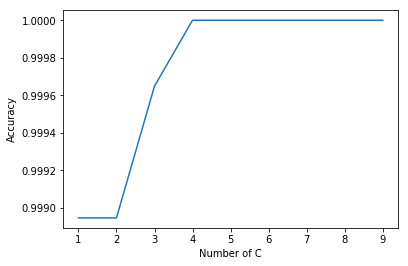

In [17]:
plt.plot(range(1,10), cv_scores)
plt.xlabel('Number of C')
plt.ylabel('Accuracy')
plt.show()